In [1]:
!pip install tensorflow

Training data shape: (60000, 784), Training labels shape: (60000,)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8172 - loss: 0.6587 - val_accuracy: 0.9513 - val_loss: 0.1723
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9536 - loss: 0.1570 - val_accuracy: 0.9624 - val_loss: 0.1314
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1056 - val_accuracy: 0.9682 - val_loss: 0.1059
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0754 - val_accuracy: 0.9692 - val_loss: 0.1022
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9815 - loss: 0.0623 - val_accuracy: 0.9722 - val_loss: 0.0943
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.0946

Test Accuracy: 0.9759


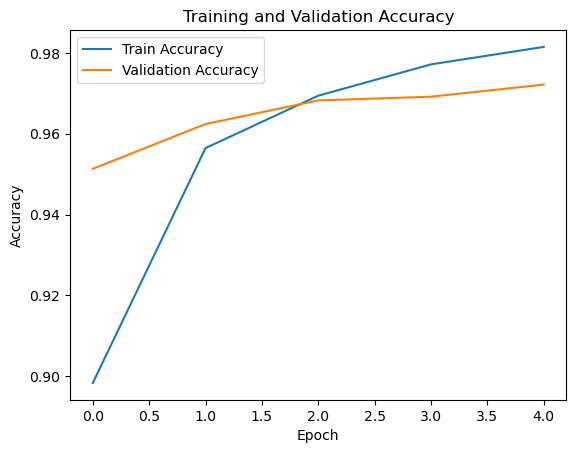

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# 1. 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 입력 데이터의 형태 (28x28 이미지를 1D 벡터로 변환)
x_train = x_train.reshape(-1, 28*28) / 255.0  # 28x28 이미지를 1차원 벡터로 펼치고, [0, 1]로 정규화
x_test = x_test.reshape(-1, 28*28) / 255.0

# 레이블은 정수형 그대로 사용 (sparse_categorical_crossentropy와 호환)
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")

# 2. 모델 구성
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),  # 첫 번째 은닉층 (128개의 뉴런)
    Dense(64, activation='relu'),  # 두 번째 은닉층 (64개의 뉴런)
    Dense(10, activation='softmax')  # 출력층 (10개의 뉴런, softmax로 확률로 변환)
])

# 모델 구조 확인
model.summary()

# 3. 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# 5. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 6. 학습 결과 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
